In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm 
import warnings 
warnings.simplefilter('ignore')

%matplotlib inline 
# to have the plots stored within the jupyter notebook 

### Loading datasets 

In [33]:
test = data = pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/Advertising.csv') 
test

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/Advertising.csv', index_col = 0) # use first column as index
data.head(10)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


### Simple linear regression
- Analyze the effect between TV and advertising sales revenue 

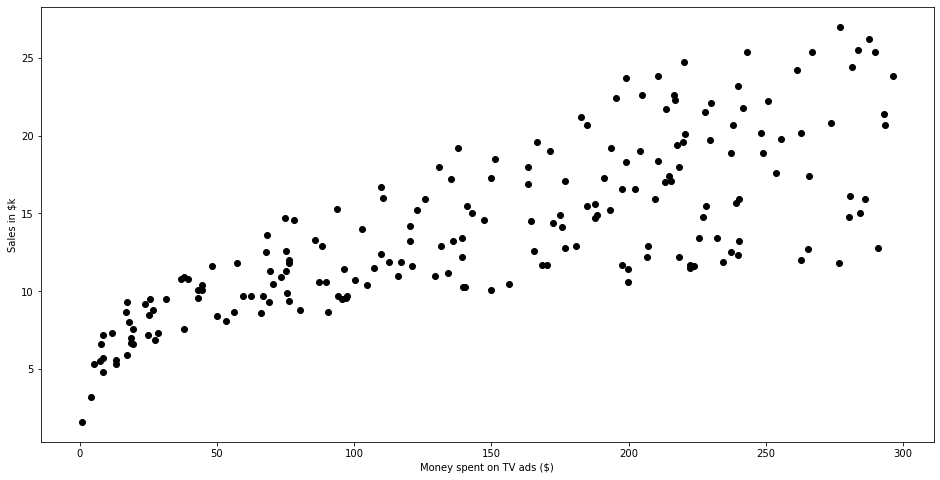

In [14]:
plt.figure(figsize = (16,8))
plt.scatter(data['TV'], data['sales'], c = 'black')
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales in $k')
plt.show()

In [9]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

print(f'The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV')

The linear model is: 
 Y = 7.032593549127693 + 0.047536640433019764*TV


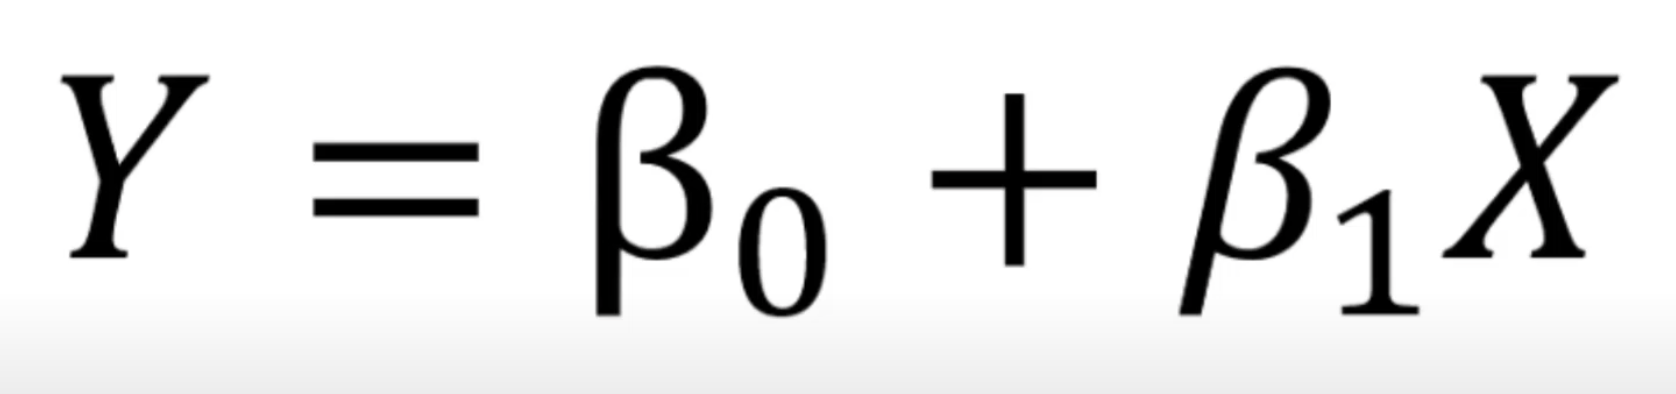

In [4]:
from PIL import Image
myImage = Image.open("/Users/William/Desktop/Screen Shot 2022-04-26 at 10.47.57 AM.png")
#myImage.show()
display(myImage)


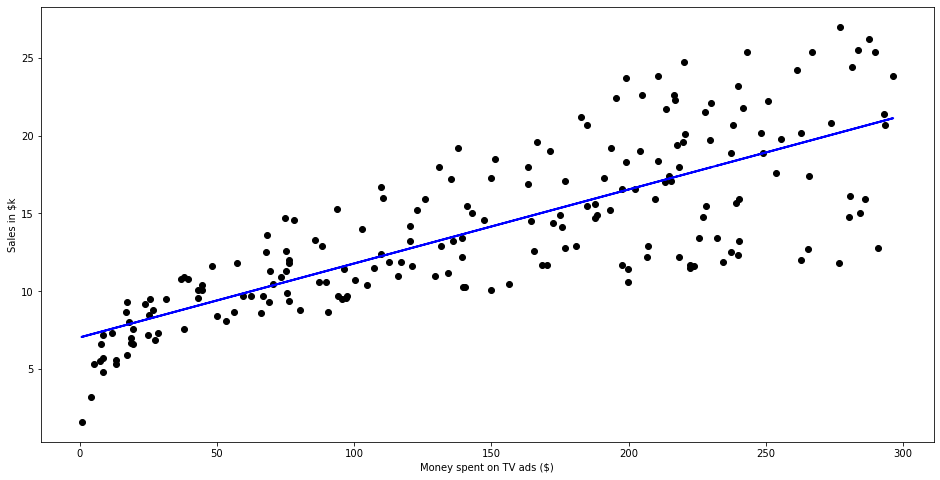

In [16]:
predictions = reg.predict(X) 

plt.figure(figsize= (16,8))
plt.scatter(X, y, c= 'black')
plt.plot(X, predictions, c = 'blue', linewidth = 2)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales in $k')
plt.show()

In [19]:
X = data['TV']
y = data['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        21:51:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

R^2 is 0.612; not good but fair; 61.2% of variability is explained 
F- statistic is 312.1 which is >> 1; model is kind of good
P value is less than 0.05 which means that the feature is relevant 

### Multiple linear regression
- TV, radio, newspaper

In [24]:
Xs = data.drop(['sales'], axis = 1) ## axis = 1 are columns; axis = 0 are rows
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

print(f'The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper')

The linear model is: 
 Y = 2.9388893694594085 + 0.045764645455397615*TV + 0.18853001691820456*radio + -0.0010374930424763272*newspaper


In [27]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
#X = data[['TV' ,'radio', 'newspaper']]
y = data['sales'].values.reshape(-1, 1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        22:03:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [28]:
X = data[['TV' ,'radio', 'newspaper']]
y = data['sales'].values.reshape(-1, 1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        22:03:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

R^2 is 0.897; 89.7% of the variability is explained 
F- statistic is 570.3 which is >> 1; model is good
P value is less than 0.05 which means that the feature is relevant EXCEPT for newspaper 
- p value 0.860 >> 0.05 means that newspaper is NOT relevant in this model; take it out 

### Classification 
- binary classification is simple (YES or NO)
- response variable is categorical or qualitative 

### Regression 
- response variable is quantitative 


### Logistic regression 
- probability:
    1) determine the probability of an observation to be part of a class or NOT 
    2) output between 0 and 1 (1 means VERY likely; perfect) 
    3) outputs greater than 1 means there is multicollinearity involved and can obscure the relationships
- by default, cannot be used for classification tasks that have more than TWO class labels 
### Functions: 
- sigmoid function --> approach asymptote when you approach 1 or -1 
- logit function is the log of the sigmoid and the probability is BOUND to 0 and 1 <-- can be applied to multiple

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train.ravel())

y_prob = logistic_reg.product_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0) #if the output is greater than 0.5, will change to 1 ( part of that class ); if not then 0
# can use loc function as well 

### Caveats of Logistic regression 
- when classes are well separated, parameters of logistic regression are unstable 
- unstable for small datasets 
- not the best to predict more than 2 classes; only be used for binary classification 

### Linear discriminant analysis (LDA) 
- models the distribution of predictors separately for each class; allows for more than two target classifications
- uses Bayes' theorem to estimate the probability 

### Bayes Theorem 
- classify into one of K classes where K => 2 
- πk is the overall proability that an observation is associated with the k-th class 
- let fk(x) denote the density function of x for an observation that comes from the k-th class 
- k of x is large if the probability of that observation from the k-th class has capital x equal to small x 
- MEANING: conditional probability of an event, based on the occurence of another event, is equal to the likelihood of the second event given the first event multiplied by the probaility of the first sevent 

### LDA for one predictor 
- normal distribution function 
- maximize the discriminant; linear funciton in respect to X 

### Assumptions of LDA for ONE predictor 
- each class is drawn from a Gaussian distrbution (normal distribution: mean, mode, and median are equal)
- each class has its own mean 
- assume a common variance 

### Assumptions of LDA for MULTIPLE predictors 
- each class is drawn from a multivariate Gaussian distribution 
- each class has its own mean vector 
- assume a common covariance matrix 

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y.train.ravel())

y_prob_lda = lda.predict_proba.(X_test)[:,1]
y_pred_lda = np.where(y_prob > 0.5, 1, 0)

### Assumptions of quadratic discriminant analysis (QDA) 
- each class is drawn from a multivariate Gaussian distribution 
- each class has its own mean vector 
- each class has its own covariance matrix 

### Discriminant of QDA
- LDA is better than logistic in some situations (logistic is better when Gaussian assumptions are NOT met--fewer assumptions)
- QDA is better than LDA mainly when using LARGE datasets and have lower bias/higher variance 
- NOTE: LDA is better for smaller datasets 

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y.train.ravel())

y_prob_qda = lda.predict_proba.(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)

### Validating the performance of the model 
- sensitivity: **true positive**  
    - proportion of ACTUAL POSITIVES identified (e.g: proportion of fradulent transactions that are actually fradulent)
- specificity: __true negative__
    - proportion of ACTIVE NEGATIVES identified (e.g: proportion of non-fradulent transactions that are actually non-fradulent)
- ROC (receiver operating characteristic) curve: 
    - take the area under the curve (AUC); the closer to 1, the better 

In [ ]:
def plot_roc(roc_auc): 
    plt.figure(figsiz=(7,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color= 'red', label = 'AUC = %0.2f' %roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')

### Logistic Regression

In [34]:
mushroom = pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/mushrooms.csv')
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [41]:
mushroom.info()
mushroom.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [57]:
for i in list(mushroom): 
    print(mushroom[i].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

### Data dictionary: 
>class: edible(e) or poisonous(p)

>cap-shape: bell(b), conical(c), convex(x), flat(f), knobbed(k), sunken(s)

>cap-surface: fibrous(f), grooves(g), scaly(y), smooth(s)

>cap-color: brown(n), buff(b), cinnamon(c), gray(g), green(r), pink(p), purple(u), red(e), white(w), yellow(y)

>bruises: bruises(t), no bruises(f)

>odor: almond(a), anise(l), creosote(c), fishy(y), foul(f), musty(m), none(n), pungent(p), spicy(s)

>gill-attachment: attached(a), descending(d), free(f), notched(n)

>gill-spacing: close(c), crowded(w), distant(d)

>gill-size: broad(b), narrow(n)

>gill-color: black(k), brown(n), buff(b), chocolate(h), gray(g), green(r), orange(o), pink(p), purple(u), red(e), white(w), yellow(y)

>stalk-shape: enlarging(e), tapering(t)

>stalk-root: bulbous(b), club(c), cup(u), equal(e), rhizomorphs(z), rooted(r), missing(?)

>stalk-surface-above-ring: fibrous(f), scaly(y), silky(k), smooth(s)

>stalk-surface-below-ring: fibrous(f), scaly(y), silky(k), smooth(s)

>stalk-color-above-ring: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

>stalk-color-below-ring: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

>veil-type: partial(p), universal(u)

>veil-color: brown(n), orange(o), white(w), yellow(y)

>ring-number: none(n), one(o), two(t)

>ring-type: cobwebby(c), evanescent(e), flaring(f), large(l), none(n), pendant(p), sheathing(s), zone(z)

>spore-print-color: black(k), brown(n), buff(b), chocolate(h), green(r), orange(o), purple(u), white(w), yellow(y)

>population: abundant(a), clustered(c), numerous(n), scattered(s), several(v), solitary(y)

>habitat: grasses(g), leaves(l), meadows(m), paths(p), urban(u), waste(w), woods(d)

In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import roc_curve, auc, confusion_matrix 

%matplotlib inline 

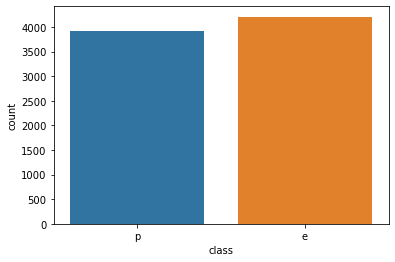

In [60]:
x = mushroom['class']
ax = sns.countplot(x=x, data = mushroom)

In [87]:
def plot_data(data):
    for i, col in enumerate(mushroom.columns):
        plt.figure(i)
        ax = sns.countplot(x=data[col], hue= data['class'], data=mushroom)

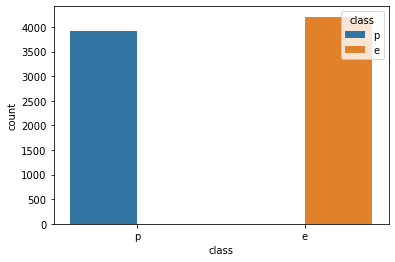

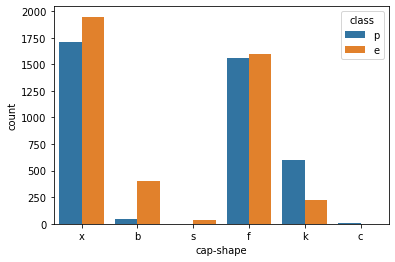

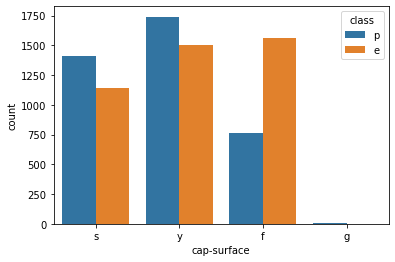

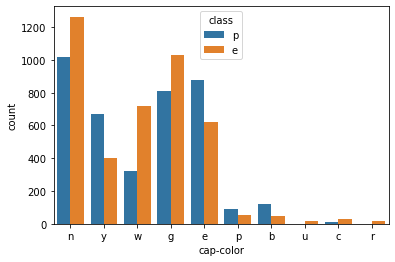

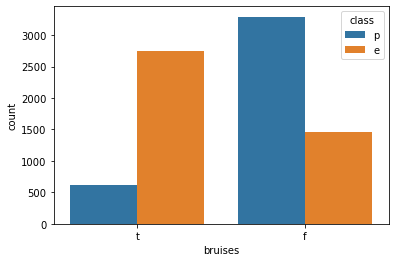

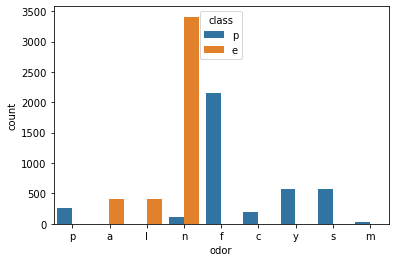

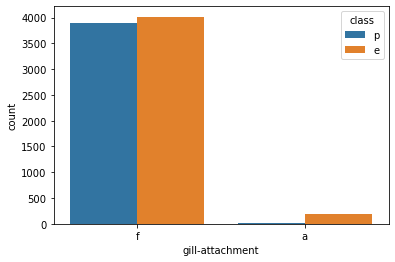

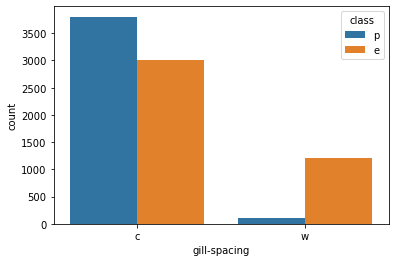

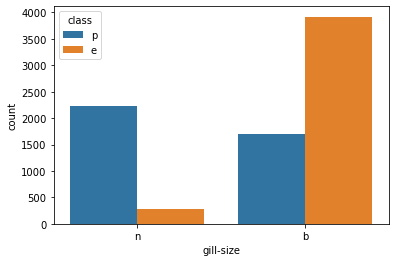

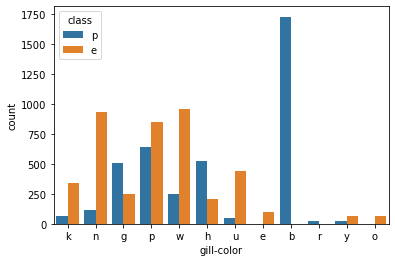

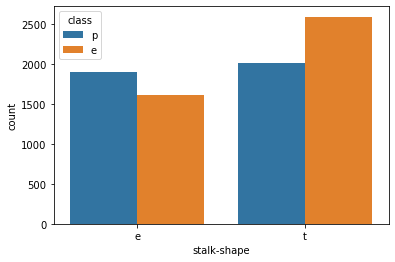

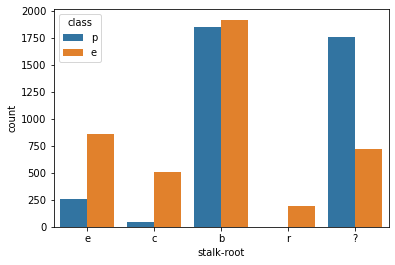

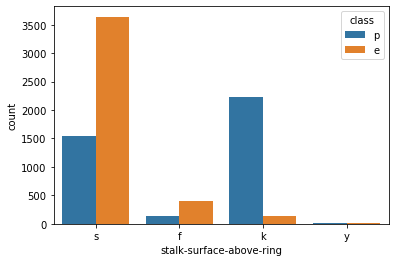

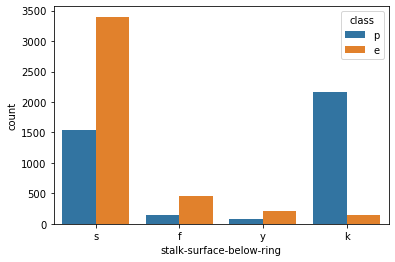

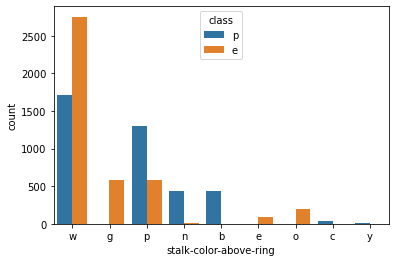

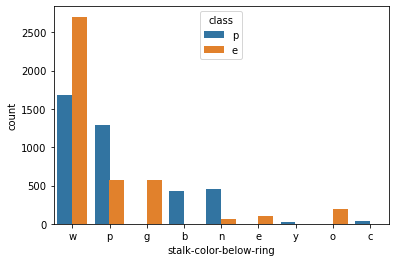

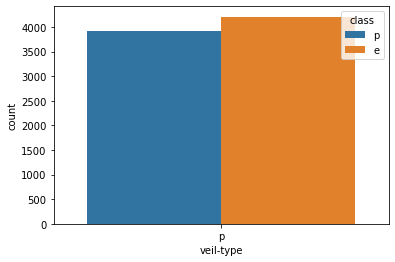

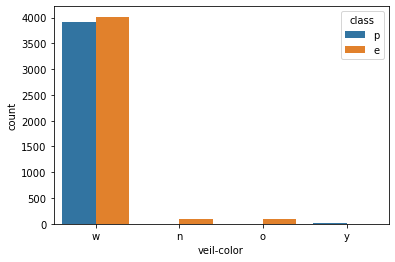

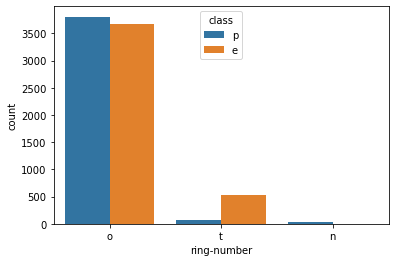

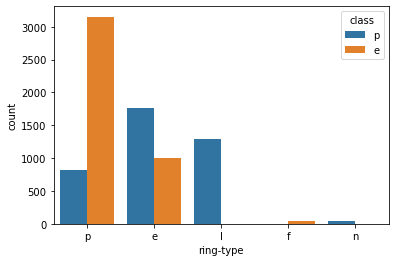

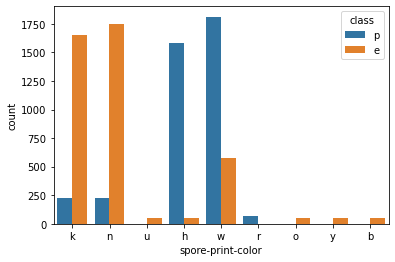

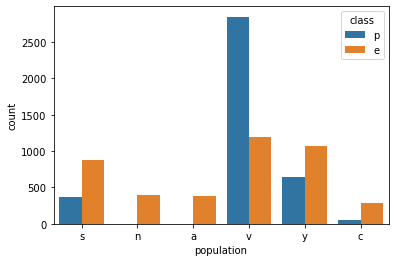

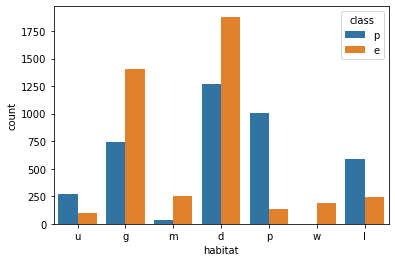

In [88]:
plot_data(mushroom)

### Preprocessing

In [89]:
for col in mushroom.columns: 
    print(f'{col}: {mushroom[col].isnull().sum()}')

#mushroom.isnull().sum()

class: 0
cap-shape: 0
cap-surface: 0
cap-color: 0
bruises: 0
odor: 0
gill-attachment: 0
gill-spacing: 0
gill-size: 0
gill-color: 0
stalk-shape: 0
stalk-root: 0
stalk-surface-above-ring: 0
stalk-surface-below-ring: 0
stalk-color-above-ring: 0
stalk-color-below-ring: 0
veil-type: 0
veil-color: 0
ring-number: 0
ring-type: 0
spore-print-color: 0
population: 0
habitat: 0


In [92]:
le = LabelEncoder()
mushroom['class'] = le.fit_transform(mushroom['class'])

mushroom['class'].value_counts()

# transforms data, from whatever domain, so that the domain is 0,...,  k-1, where k is the number of classes 
# we have two classes which is perfect for binary classification 
# label encoder can also implies a relationship about order 

0    4208
1    3916
Name: class, dtype: int64

In [93]:
encoded_data = pd.get_dummies(mushroom)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Logisitic Regression Model 

In [95]:
y = mushroom['class'].values.reshape(-1,1)
X = encoded_data.drop(['class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# 20% of the dataset will be randomly removed to be test set and the rest to train 
# 80% of the observations from the dataset will be used to train and fit the model 

'''
NOTES: 
X_train = ALL independent variables used to train; in this case 80% will be used for training
X_test = ALL independent variables used to test and make predictions; remainder from the train 
y_train = TARGET or dependent variable which needs to be predicted by this model; includes category labels against independent variables 
y_test = TARGET or dependent variable which needs to be compared to prediction value with given X_test to test the accuracy between actual and predicted categories 
'''

In [96]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train.ravel())
y_prob = logistic_reg.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [97]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
log_confusion_matrix
# shows how m any mushrooms were correctly c lassified 
# if they are equal then there will be a diagnoal matrix; all poisonous or non- poisonous mushrooms were correctly identified 
'''        predicted 0     predicted 1 
actual 0    TN              FP 
actual 1    FN              TP '''

array([[843,   0],
       [  0, 782]])

In [100]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
# confirms the confusion matrix; 1 means perfect classification 

1.0

In [110]:
def plot_roc(roc_auc): 
    plt.figure(figsize = (10,10))
    plt.title('Recever Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, c = 'red', label = 'AUC  = %0.2f' % roc_auc)
    # approximated to the 2 decimal places 
    plt.legend(loc ='lower right')
    plt.plot([0,1], [0,1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


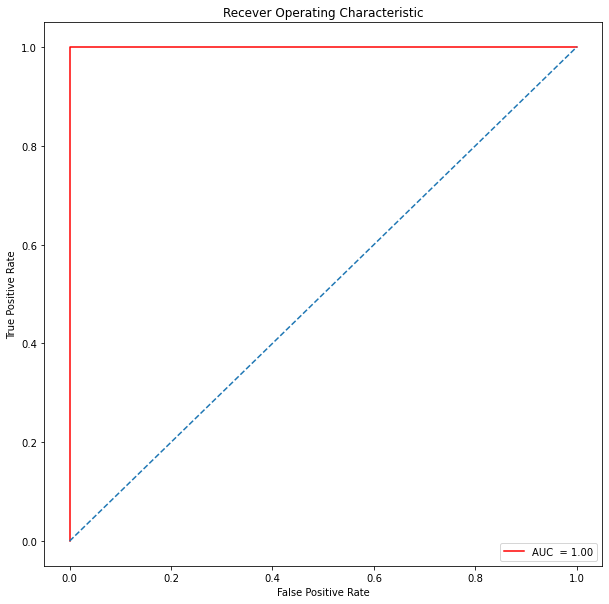

In [111]:

plot_roc(roc_auc)
# perfect roc curve--hugging the uppper left corner

### Linear discriminant analysis (LDA)

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())

y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

In [115]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[843,   0],
       [  0, 782]])

### Resampling and regularization
- resampling: important for model performance and validation
    - done in every data science task 
    - e.g: cross-validation 
- regularization: used to prevent overfitting and improve performance 
    - e.g: ridge regression and lasso 

### Resampling methods importance: 
- repeatedly draw samples from a training set and refit the model 
- gains more information than fitting once 
- see how model would perform without collecting new data (unseen data)
    - model in production needs to be able to do this 

### Cross-validation (COMMON resampling method)
- used to evaluate a model's performance and find the best parameters for the model 
- 3 approaches : 
    - validation set: 
        - most BASIC approach 
        - have a dataset with n-points and randomly split the dataset into a training and test set 
        - drawbacks: 
            - test error rate is variable depending on which observations were used in the training and validation set due to random spltting
            - only a small subset of data is used for training whereas ideally you want as mcuh data as possible for training 
    - leave-one-out cross-validation 
        - only one observation is used for validation; the rest is used for training; this is repeated n-times to the n-points within the dataset 
        - error rate is approximated as the average of errors for each run; benefit is no randomness 
        - drawbacks: 
            - not a viable option for VERY LARGE datasets (will take a LONG time)
    - k-fold cross-validation 
        - most COMMON approach 
        - randomly divide the dataset into k groups or folds of equal size and repeat the process k-times 
        - LOOCV is a special k-fold where k = n 
        - usually set k to 5 or 10 


### Regularization 
- models can overfit or not generalize well 
- poor performance on 'unseen' data or new data 
- biase and variance trade off
    - high bias and low variance
    - low bias and high variance 

### Regularization methods: decorrelate the model to prevent overfitting 
- ridge regression = L2 regularization 
    - traditional linear fitting minimizes the RSS (residual sum of sqaures)
    - solution: add the sum of parameters squared with a coefficent lambda 
        - lambda is a tuning parameter 
        - find the best value of lambda using cross validation and use a range ; best value will minimize the test error 
        - all predictors are kept
        - L2 regularization 
- lasso = L1 regularization 
    - solution: add the sum of absolute values of ALL coefficients and retain lambda 
        - IF lambda is LARGE enough, some betas will go to 0 
            - feature selection 
- AKA shrinkage methods 

## Decision Trees 
- works with regression and classification 
- divide the prediction space into a number of regions 
- set of splitting rules can be summarized in a tree 
- single decision tree is often NOT better than linear regression, logistic regression, or linear discriminant analysis 
    - bagging, random forests, and boosting can DRAMATICALLY improve performance 

### Terminologies 
- trees are drawn upside down 
- final regions are called **leaves** 
- point where a split occurs is called a **node** 
- segments that connect the nodes are **branches** 

### Regression trees 
- divide the predictor space into J distinct and non-overlapping regions
- for every observation that falls in a region, predict the mean of the response value in that region 
- each region is split to minimize the RSS (residual sum of squares)
- uses a top-down greedy approach called **recursive binary splitting**
    - top down: all observations are in a single region before the first split
    - greedy: the best split occurs at a particular step to make the best predictions at the that step, rather than looking forward and making a split that will give a better result in a future step 
- drawbacks: 
    - may lead to overfitting 
    solution: 
        - 'prune' the tree using cross validation 

### Classification tree 
- similar to regression tree 
- EXCEPT you are predicting the most commonly occuring class in a region 
- RSS CANNOT be used; each split must minimize the **classification error rate** 
    - classification error rate: fraction of training observations in a region that doesn't belong in the most common class 
    - drawback: 
        - not sensitive enough for tree growing 
        - solution: 
            - gini index
                - measure of TOTAL variance across all classes 
                - will be closer to 0 if the proportion is close to 0 or 1
                - good measure of node purity 

            - cross-entropy 

## Advanced decision trees 
### Bagging 
- bagging = bootstrap aggregation 
    - bootstrap can compute the standard deviation of any quantity 
        - for decision trees, variance tends to be HIGH since they are PRONE to overfitting
    - can reduce the variance and improve the performance of a decision tree 
- repeatedly drawing samples from dataset, generating B different bootstrap training sets 
- train on all bootstrapped training sets to get a prediction for each set and average the prediction 
- can construct a higher number of trees that overfit (having high variance and low bias) 
    - average the predictions of these trees to reduce variance and improve performance 

### Random forest 
- improves upon bagging by making a small tweak that decorrelates the trees 
- multiple decision trees are built 
    - on each split, only a random sample of m predictors are chosen from all p predictors 
- the split is only allowed to use ONE of the m predictors 
- differences : 
    - in bagging, if there is a strong predictor, it will likely be the top split and all trees will be similar 
        - variance will NOT be reduced 
    - in random forest, this can be avoided since we are forcing a random sample of predictors in each split -- only a subet of predictors is forced for each split 
    - if m = p, then it is bagging
        - if not then m √(p) 

### Boosting
- similar to bagging but trees are grown sequentially 
    - each tree uses information from the previous grown tree 
- learns slowly 
- each tree splits the residuals instead of the target variable so each tree is small and will improve the predictions slowly 
- 3 *main* tuning parameters: 
    - number of trees (B)
        - boosting can overfit if B is too large--use cross validation 
    - shrinkage parameter (alpha)
        - small positive number that controls the learning rate 
            - typically 0.01 or 0.001 
    - number of splits in each tree (d) 
        - controls the complexity of the boosted ensemble 
        - single split works best/well (d=1)
        - **interaction depth** 

## Support Vector Machine (SVM) --> supervised machine learning 
- classification 
    - logistic regression, LDA, QDA, decision trees 
- suport vector machien (SVM) is another algorithm for classification 
- MAIN ADVANTAGE: accomodate NON-LINEAR boundaries 
- can be used for both classificaiton and regression challenges 

### Maximal margin classifier
- basic algorithm from which SVM extenbds
- separates different classes using a hyperplane in the p dimensional space 
    - in a p-dimensional space, a hyperplane is a flat affine subsapce of dimension p-1 
        - in 2D, it will be a line 
        - in a 3d, it will be a flat plane 
    - if a an observation satisifies the equation, then the point is on the line--if not then it iwll be above or below 
- if data is separately perfectly, there is an infinite number of hyperplanes 
- therefore: use the maximal margin hyperplane or optimal separating hyperplane 
    - calculate the perpendicular distance between each training obseration and the hyperplane ==> margin 
    - the optimal separating hyperplane is the one with the LARGEST margin 
- hyperplane depends on the support vectors based on the maximal margin classifier 
    - if those points move, then the hyperplane moves as well 


### SVM 
- used when there is NO clear separation between the classes 
- SVM is an extension of hte maximal margin classifier 
- uses kernels to enlarge the feature space and accomodate for non-linear boundaries between classes 
    - kernel is a function that quantieis the similarity of two observations 
    - can be a function of any degree; degrees >1 means more flexibiliyuy 




## Unsupervised learning
- scenarios where there are featuers but no targets 
- cannot make predictions 
- find interesting ways to visualize the data or group similar observations together
- drawbacks: 
    - more challenging because the analysis is subjective
    - hard to assess results; don't know the true answer


### Techniques 
#### Principal component analysis (PCA) 
- process by which principal components are computeed and used to better understand the data 
    - principal component 
        - visualize n observations with measurements on a set of p features 
        - can examine 2D plots of 2 features at a time but that is not efficient/unrealistic if p is very large 
    - find a low dimensional representation of dataset that contains as much possible of the variance 
    - only conside the most 'interesting' features because they account for the majority of the variance 
    - PC: normalized linear combination of the features that have the largest variance 
        - similar to linear regression 
        - first component is linear, second is perpendicular to the first, third is perpendicular to the first two, ... and so forth 
- can be used for visualization 

#### Clustering
- set of techniques for finding subgroups or clusters within a dataset 
- partition the data into observations that are similar to each other 
    - e.g: market segmentation within marketing 
- k-means clustering: partition the data into the specified number of K clusters 
- hierarchial clustering: unspecified number of clusters 
    - get a dendrogram to view all the clusters for each possible numhber of clusters 

#### K-means clustering
- separates the observations into k clusters (must be provided)
    - assumes that: 1) each observation belogs to at least ONE of the k clusters 
                    2) clusters do not overlap 
- variation is minimized within a cluster 
- achieved by minimizing the sum of squared Euclidean distance between each observation within a cluster 
    - to minimize: 1) randomly assign a number, from 1 to k, to each observation (initializing) 
                   2) for each cluster, compute the **centroid** (vector that represents the mean of the features for the observations in the cluster)
                   3) assign each observation to the cluster whose centroid is the closest (shortest Euclidean distance) 
                   4) iterate until the cluster assignment stops changing 
    - algorithm WILL find a LOCAL minimum 
        - highly depends on the initial random cluster assignment 
        - must run the algorithm MULTIPLE times so see the variation if any 



#### Hierarchial clustering
- disadvantage of k-means: requires human input to specify the number of clusters 
- hierarchial clustering: no initial number of clusters is required 
    - **agglomerative clustering** (common type)
        - dendrogram is generated from the leaves and clusters are combined up to the trunk


- define a *dissimilarity* measure between each pair of observations, and assume that each observation pertains to its own cluster 
    - dissimilarity distance is usually the Euclidean distance 
        - disimilarity measurement depends on the type of **linkage**
            - 4 types:  1) complete: maximal intercluster dissimilarity 
                            - compute ALL pairwise dissimilarities in cluster A and B--record the **largest** of these dissimilarities 
                        2) single: minimal intercluster dissimilarity 
                            - compute ALL pairwise dissimilarities in cluster A and B--record the **smallest** of these dissimilarities 
                            - single observations are fused one at a time 
                        3) average: mean intercluster dissimilarity 
                            - compute all pairwise dissimilarities in cluster A and B--record the **average** of these dissimilarities 
                        4) centroid: dissimilarities between centroid of cluster A and B 
                            - smaller clusters are more similar to the larger cluster than to their individual clusters 
                            - this can result in inversions 
            - most popular: complete, average, and centroid 
                - single tends to yield dendrograms that are unbalanced = not favorable 
            - final dendrogram is strongly dependent on the type of linkage  
- the two MOST SIMILAR clusters are FUSED; so there is n-1 clusters 
- other TWO SIMILAR clusters are fused; so there is n-2 clusters 
    - this is repeated until all observations are part of 1 cluster 
